In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import *

In [11]:
inputfile = "05jun_fcfs.txt"

fcfs = pd.read_table("05jun_fcfs.txt", " ")
llv = pd.read_table("05jun_llv.txt", " ")

In [12]:
def cleanse(df):
    df['dt1'] = df['dt1'] + " " + df['dt2'] + " " + df['dt3'] + " " + df['dt4']
    df = df.drop(['dt2', 'dt3', 'dt4', 'collisions', 'unknown'], axis=1)
    df['dt1'] = df['dt1'].apply(lambda x: pd.to_datetime(parse(x)))
    minval = df['dt1'].min()
    df['dt1'] = df['dt1'].apply(lambda x: x - minval)
    df = df.sort_values(by='dt1')
    df['profit'] = ((df['revenue'] - df['costs'])/100) - df['penalties']
    df['avgDelTime'] = df['avgDelTime'] / 60
    df['avgWaitTime'] = df['avgWaitTime'] / 60
    df['delTimes'] = df['avgDelTime'] - df['avgWaitTime']
    df['avgProfitPerDelivery'] = df['profit'] / df['deliveries']
    df['avgRevenuePerDelivery'] = df['revenue'] / df['deliveries']
    return df

fcfs = cleanse(fcfs)
llv = cleanse(llv)

fcfs3 = fcfs.loc[fcfs['controller'] == 3]
fcfs2 = fcfs.loc[fcfs['controller'] == 2]

llv3 = llv.loc[llv['controller'] == 3]
llv2 = llv.loc[llv['controller'] == 2]

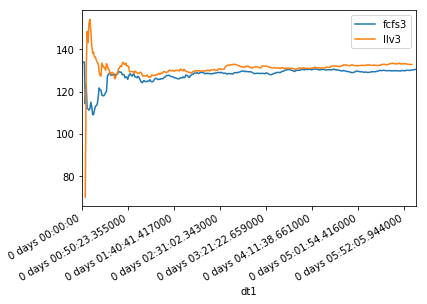

In [13]:
yaxis = 'avgRevenuePerDelivery'
ax = fcfs3.plot(x='dt1', y=yaxis)
# fcfs2.plot(x='dt1', y=yaxis, ax=ax)
llv3.plot(x='dt1', y=yaxis, ax=ax)
# llv2.plot(x='dt1', y=yaxis, ax=ax)
ax.legend(["fcfs3", "llv3"]);
plt.show()